In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from pathlib import Path
rng = np.random.default_rng()
DATA_DIR = Path('../data')

# 简单练习

warm_up_exercise

In [2]:
A = np.eye(5)
print(f'{A=}')

A=array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])


# 单变量线性回归
Linear regression with one variable

根据城市人口数量，预测开小吃店的利润
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

Population Profit


In [3]:
data = np.loadtxt(DATA_DIR / 'ex1data1.txt',delimiter=',')
m = len(data)
X = np.hstack((np.ones((m, 1)), data[:, :1]))
y = data[:, 1:]
print(f'{X=}\n{y=}')

X=array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],

Text(0, 0.5, 'Population of City in 10,000s')

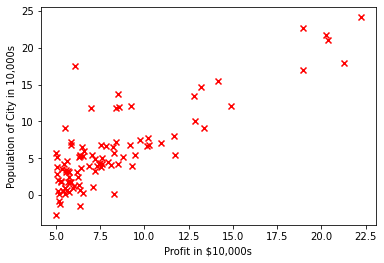

In [4]:
## Plotting the Data

fig, ax = plt.subplots()
ax.scatter(X[:, 1:], y, c='red', marker='x')

ax.set_xlabel('Profit in $10,000s')
ax.set_ylabel('Population of City in 10,000s')

# ax.axis([4, 24, -5, 25])

In [5]:
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

## Gradient Descent
代价函数：
$$ J(θ)=\frac{1}{2m}\sum\limits_{i-1}^{m}(h_θ(x)^{(i)}-y^{(i)})^2 $$

In [6]:
def compute_cost(X, y, theta):
    return ((a := (X @ theta) - y).T @ a / (2 * X.shape[0]))[0][0]

# def compute_cost2(X, y, theta):
#     return (((X @ theta) - y) ** 2).sum() / (2 * X.shape[0])

# def compute_cost3(X, y, theta):
#     return ((((X * theta.T) - y) ** 2) / (4 * X.shape[0])).sum()


In [7]:
compute_cost(X, y, theta)

32.072733877455676

In [8]:
### gradientDescent

def gradient_descent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        theta = theta - alpha*(X.T @ (X @ theta - y) / m)
    return theta


def gradient_descent_with_costs(X, y, theta, alpha, iterations):
    costs = np.empty((iterations + 1))
    for i in range(iterations):
        costs[i] = compute_cost(X, y, theta)
        theta = theta - alpha*(X.T @ (X @ theta - y) / m)
    costs[-1] = compute_cost(X, y, theta)
    return theta, costs

In [9]:
g = gradient_descent(X, y, theta, alpha, iterations)
print(f'{g = !s}')

g = [[-3.63029144]
 [ 1.16636235]]


In [10]:
print(f'predict1: {([[1, 3.5]] @ g)[0][0]}')
print(f'predict2: {([[1, 7]] @ g)[0][0]}')

predict1: 0.4519767867701767
predict2: 4.534245012944712


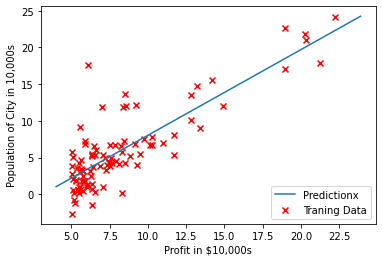

In [11]:
fig, ax = plt.subplots()

x = np.arange(4, 24, 0.1)
h = g[0, 0] + g[1, 0]*x

ax.plot(x, h, label='Predictionx')

ax.scatter(X[:, 1:], y, c='red', marker='x', label='Traning Data')
ax.set_xlabel('Profit in $10,000s')
ax.set_ylabel('Population of City in 10,000s')

ax.legend(loc=4)

In [12]:
def gradient_descent_vals(X, y, theta, alpha, iterations):
    theta_vals = np.empty((iterations+1, theta.shape[0]))
    theta_vals[0] = theta.T
    for i in range(iterations):
        theta_vals[i+1] = theta_vals[i] - alpha*((X@np.expand_dims(theta_vals[i], axis=1) - y).T @ X / m)
    return theta_vals

In [13]:
theta0_vals = np.arange(-10, 10.01, 0.05) # x, 列
theta1_vals = np.arange(-1, 4.01, 0.05) # y, 行
costs = np.empty((len(theta1_vals), len(theta0_vals)))

xv, yv = np.meshgrid(theta0_vals, theta1_vals)

for i, theta1 in enumerate(theta1_vals): # 行
    for j, theta0 in enumerate(theta0_vals): # 列
        t = np.array([[theta0], [theta1]])
        costs[i, j] = compute_cost(X, y, t)

xv.shape, yv.shape, costs.shape

((101, 401), (101, 401), (101, 401))

Text(0.5, 0, '$J$')

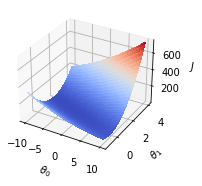

In [14]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xv, yv, costs, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$θ_0$')
ax.set_ylabel('$θ_1$')
ax.set_zlabel('$J$')

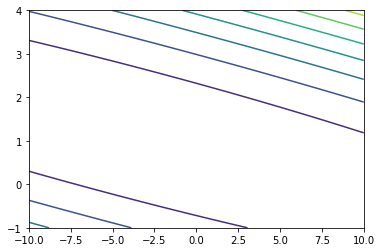

In [15]:
fig, ax = plt.subplots()
ax.contour(xv, yv, costs)

# Linear regression with multiple variables
## Feature Normalization

In [16]:
data = np.loadtxt(DATA_DIR / 'ex1data2.txt', delimiter=',')
m = len(data)
data = (data - data.mean(axis=0)) / data.std(axis=0)
X = np.hstack((np.ones((m, 1)), data[:, :-1]))
y = data[:, -1:]
theta = np.zeros((X.shape[1], 1))
alpha = 0.01
iterations = 1500
print(X)
print(y)

[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

In [17]:
def compute_cost_multi(X, y, theta):
    return ((a := (X @ theta) - y).T @ a / (2 * X.shape[0]))[0, 0]


In [18]:
gradient_descent(X, y, theta, alpha, iterations)

array([[-9.46701346e-17],
       [ 8.84137547e-01],
       [-5.25503786e-02]])

In [19]:
g, costs = gradient_descent_with_costs(X, y, theta, alpha, iterations)
print(f'{g = !s}\n\n{costs = !s}')
compute_cost(X, y, g)

g = [[-9.46701346e-17]
 [ 8.84137547e-01]
 [-5.25503786e-02]]

costs = [0.5        0.49080152 0.48186894 ... 0.13352767 0.13352767 0.13352766]


0.1335276647713292

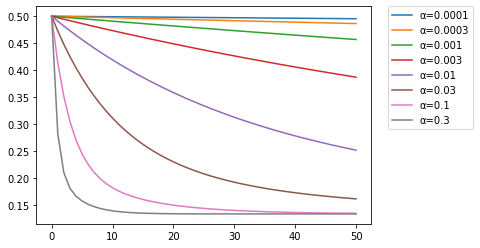

In [20]:
### Selecting learning rates

fig, ax = plt.subplots()
for alpha in [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]:
    _, costs = gradient_descent_with_costs(X, y, theta, alpha, 50)
    ax.plot(costs, label=f'α={alpha}')

ax.legend
ax.legend(loc=2, bbox_to_anchor=(1.05,1.0), borderaxespad = 0.)

In [21]:
def normal_eqn(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

In [22]:
normal_eqn(X, y)

array([[ 1.38777878e-17],
       [ 8.84765988e-01],
       [-5.31788197e-02]])

In [23]:
# scikit-learn
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(data[:, :-1], y)
print(reg.intercept_[0], *reg.coef_[0], sep=', ') # θ 保存为(1, 2)，θ_0 在reg.intercept_ (1,)


-7.76616595711711e-17, 0.8847659878549525, -0.053178819663279434


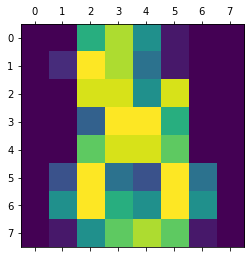

(1797, 8, 8)

In [24]:
from sklearn import datasets
digits = datasets.load_digits()

plt.matshow(digits.images[1796])
plt.show()
digits.images.shape